<a href="https://colab.research.google.com/github/Milham10/PracticeML/blob/main/GlaucomaRIM_RandomDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
from imutils import paths
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from google.colab import drive
import zipfile
import cv2
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Processing Hospital dataset

In [4]:
img_paths = '/content/drive/MyDrive/dataset/RIM-ONE_DL_images.zip'
zip_ref = zipfile.ZipFile(img_paths, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [5]:
TRAINING_PATH = '/content/RIM-ONE_DL_images/partitioned_by_hospital/training_set'
VALIDATION_PATH = '/content/RIM-ONE_DL_images/partitioned_by_hospital/test_set'

In [6]:
train_glaucomaPath = os.path.join(TRAINING_PATH, 'glaucoma')
train_normalPath = os.path.join(TRAINING_PATH, 'normal')
validation_glaucomaPath = os.path.join(VALIDATION_PATH, 'glaucoma')
validation_normalPath = os.path.join(VALIDATION_PATH, 'normal')

In [7]:
%matplotlib inline
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

In [8]:
train_glaucoma = os.listdir(train_glaucomaPath)
train_normal = os.listdir(train_normalPath)

validation_glaucoma = os.listdir(validation_glaucomaPath)
validation_normal = os.listdir(validation_normalPath)

In [9]:
%matplotlib inline
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

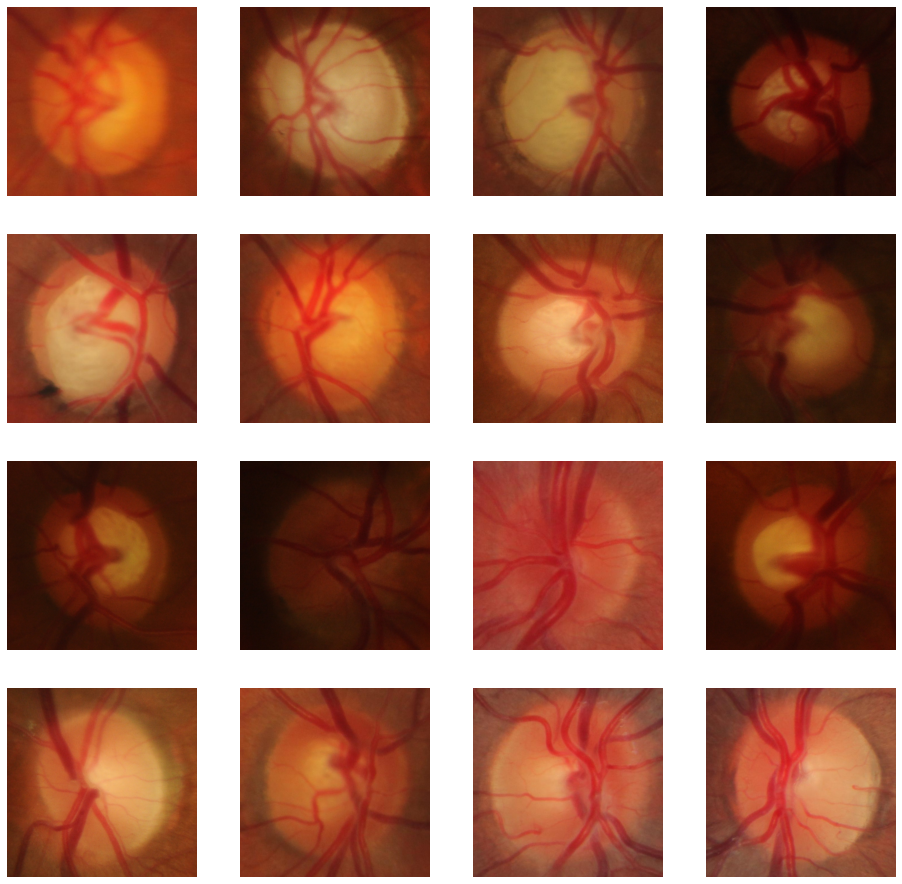

In [10]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_paper_pic = [os.path.join(train_glaucomaPath, fname) 
                for fname in train_glaucoma[pic_index-8:pic_index]]
next_plastic_pic = [os.path.join(train_normalPath, fname) 
                for fname in train_normal[pic_index-8:pic_index]]

for i, img_path in enumerate(next_paper_pic + next_plastic_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [11]:
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        TRAINING_PATH,  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 300x300
        batch_size=128,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='binary')

# Flow validation images in batches of 128 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        VALIDATION_PATH,  # This is the source directory for validation images
        target_size=(224, 224),  # All images will be resized to 300x300
        batch_size=32,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='binary')

Found 311 images belonging to 2 classes.
Found 174 images belonging to 2 classes.


# Preprocessing Dataset

In [4]:
img_paths = '/content/drive/MyDrive/dataset/RIM-ONE_DL_images.zip'
zip_ref = zipfile.ZipFile(img_paths, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [5]:
image_paths=paths.list_images("/content/RIM-ONE_DL_images/partitioned_randomly")
gambar = []
label = []

In [6]:
from sklearn import preprocessing
for images in image_paths:
  image = Image.open(images)
  image = image.convert('RGB')
  image = np.array(image.resize((224,224))) / 255.0

  gambar.append(image)
  labels=images.split(os.path.sep)[-2]
  label.append(labels)

In [7]:
labels_train_unique = np.unique(np.array(label))

In [8]:
temp = np.array(gambar)
print(temp.shape)

(485, 224, 224, 3)


In [9]:
temp2=np.array(label)
print(temp2.shape)
print(label)

(485,)
['glaucoma', 'glaucoma', 'glaucoma', 'glaucoma', 'glaucoma', 'glaucoma', 'glaucoma', 'glaucoma', 'glaucoma', 'glaucoma', 'glaucoma', 'glaucoma', 'glaucoma', 'glaucoma', 'glaucoma', 'glaucoma', 'glaucoma', 'glaucoma', 'glaucoma', 'glaucoma', 'glaucoma', 'glaucoma', 'glaucoma', 'glaucoma', 'glaucoma', 'glaucoma', 'glaucoma', 'glaucoma', 'glaucoma', 'glaucoma', 'glaucoma', 'glaucoma', 'glaucoma', 'glaucoma', 'glaucoma', 'glaucoma', 'glaucoma', 'glaucoma', 'glaucoma', 'glaucoma', 'glaucoma', 'glaucoma', 'glaucoma', 'glaucoma', 'glaucoma', 'glaucoma', 'glaucoma', 'glaucoma', 'glaucoma', 'glaucoma', 'glaucoma', 'glaucoma', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal'

In [10]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
label = lb.fit_transform(label)
print(label)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(np.array(gambar), np.array(label), test_size=0.2, shuffle=True)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(388, 224, 224, 3)
(97, 224, 224, 3)
(388, 1)
(97, 1)


# Arsitektur

In [12]:
from tensorflow.keras.optimizers import Adam, Nadam, Adamax, RMSprop, SGD
opt        = Adam(learning_rate=0.0001)                       
epochs     = 100                                     
batch_size = 32

9406464/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                

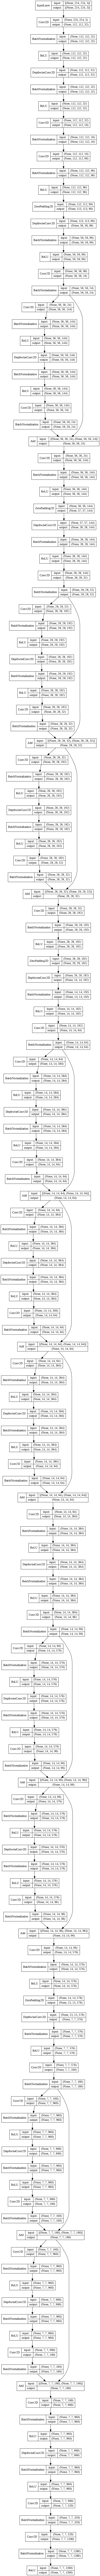

In [13]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.utils import plot_model

'''
> weights='imagenet'            bobot diawal diisi langsung dengan bobotnya "cerdas"nya imagenet (pre-trained), jumlah epoch bisa sedikit
> weights=None                  bobot diawal diisi dengan nilai secara acak (random), jika menggunakan ini perbanyak jumlah epoch
> include_top=False             tidak mengikutsertakan fully-connected layer (karena akan didefinisikan secara terpisah dan menyesuaikan
                                dengan dataset yang dipakai), dengan kata lain yang diambil hanya feature extractor layernya saja
> conv_base.trainable=False     hanya diaktifkan jika weights='imagenet', artinya bobot di feature extractor tidak akan diperbarui saat
                                training (freeze), dengan kata lain "proses belajar" hanya akan dilakukan di fully-connected layer yang
                                telah didefinisikan sebelumnya secara terpisah. (feature extractor hanya tinggal dipakai saja)
'''

conv_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3)) # ⚠️ SESUAIKAN ⚠️
conv_base.trainable = False                                                                                   # ⚠️ SESUAIKAN ⚠️
conv_base.summary()
plot_model(conv_base, to_file='model.png', show_shapes=True, show_layer_names=False, rankdir='TB', expand_nested=False, dpi=80)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


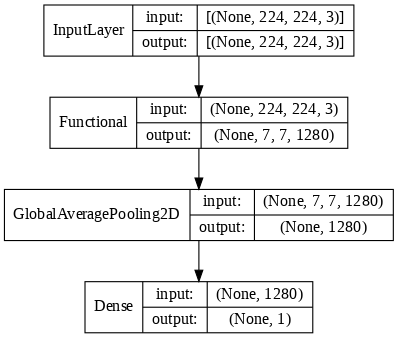

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam

def define_model_mobilenetv2():
    model = Sequential()
    
    # 01-Feature Extractor Layer
    model.add(conv_base)                        # Feature Extractor pakai pre-trained model
    model.add(GlobalAveragePooling2D())
    
    # 02-Flatten Layer
    #model.add(Flatten())
    
    # 03-Fully Connected Layer
    #model.add(Dense(128, activation='relu'))    # ⚠️ SESUAIKAN ⚠️
    #model.add(Dropout(0.5, seed=10))            # ⚠️ SESUAIKAN ⚠️ (Coba pakai seed=0 atau 1,2,3,...)
    #model.add(Dense(64, activation='relu'))     # ⚠️ SESUAIKAN ⚠️
    # model.add(Dropout(0.5, seed=10))            # ⚠️ SESUAIKAN ⚠️ (Coba pakai seed=0 atau 1,2,3,...)
    model.add(Dense(1, activation='sigmoid'))   # ⚠️ SESUAIKAN ⚠️
    
    # Compile Model
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy']) # ⚠️ SESUAIKAN ⚠️
    return model

# Bersihkan model sebelumnya (keperluan re-training)
if "model" in globals(): # Check jika apakah variable model ada?
  del model
  gc.collect()

model = define_model_mobilenetv2()
model.summary()
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False, rankdir='TB', expand_nested=False, dpi=80)

# Traing K-Fold

In [15]:
path_save = '/content/'

In [16]:
%%time

import pandas as pd
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit

def evaluate_model(dataX, dataY, n_folds=5):  # ⚠️ SESUAIKAN ⚠️ (Hanya Data Train yang digunakan, nanti dipecah jadi Train & Validasi oleh library)

    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1) # ⚠️ SESUAIKAN ⚠️ (1 sebagai seed/index shuffle, agar saat run ulang nanti hasil shuffle sama)

    i = 0
    # enumerate splits
    for train_ix, val_ix in kfold.split(dataX):
        i = i+1
        # define model
        model = define_model_mobilenetv2()    # ⚠️ SESUAIKAN ⚠️
        # model = define_model_kustom()    # ⚠️ SESUAIKAN ⚠️
        # select rows for train and test
        trainX, trainY, valX, valY = dataX[train_ix], dataY[train_ix], dataX[val_ix], dataY[val_ix]
        # fit model
        history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, Y_test), verbose=1)
        # evaluate model
        loss, acc = model.evaluate(valX, valY, verbose=0)
        print('\nAkurasi Fold ke-' + str(i) + ' = %.3f' % (acc * 100.0))
        print('Loss Fold ke-' + str(i) + ' = %.3f' % (loss) + '\n')
        # append scores
        scores.append(acc)
        histories.append(history)

        #----------------------------- Additional -----------------------------#

        # 01 - Save model as h5
        model.save(path_save+"/model_fold_" + str(i) + ".h5")            # ⚠️ SESUAIKAN ⚠️    

        # 02 - Save model report to csv
        model_csv = pd.DataFrame(history.history)
        csv_file = path_save+"/model_fold_" + str(i) + ".csv"           # ⚠️ SESUAIKAN ⚠️
        with open(csv_file, mode="w") as f:
          model_csv.to_csv(f)
        
        # 03 - Clean the RAM for every Fold
        #del trainX
        #del trainY
        #del valX
        #del valY
        #del model
        #gc.collect()

        #----------------------------------------------------------------------#

    return scores, histories
    
scores, histories = evaluate_model(X_train, Y_train)

Epoch 1/100
13/13 [==============================] - 13s 227ms/step - loss: 0.7427 - accuracy: 0.4716 - val_loss: 0.7169 - val_accuracy: 0.5258
Epoch 2/100
13/13 [==============================] - 1s 57ms/step - loss: 0.6985 - accuracy: 0.5928 - val_loss: 0.6810 - val_accuracy: 0.6495
Epoch 3/100
13/13 [==============================] - 1s 56ms/step - loss: 0.6809 - accuracy: 0.6289 - val_loss: 0.6632 - val_accuracy: 0.6598
Epoch 4/100
13/13 [==============================] - 1s 55ms/step - loss: 0.6672 - accuracy: 0.6289 - val_loss: 0.6535 - val_accuracy: 0.6598
Epoch 5/100
13/13 [==============================] - 1s 56ms/step - loss: 0.6536 - accuracy: 0.6418 - val_loss: 0.6412 - val_accuracy: 0.6701
Epoch 6/100
13/13 [==============================] - 1s 56ms/step - loss: 0.6416 - accuracy: 0.6572 - val_loss: 0.6311 - val_accuracy: 0.6804
Epoch 7/100
13/13 [==============================] - 1s 56ms/step - loss: 0.6315 - accuracy: 0.6778 - val_loss: 0.6211 - val_accuracy: 0.7216
Epoc

In [17]:
os.chdir(path_save)

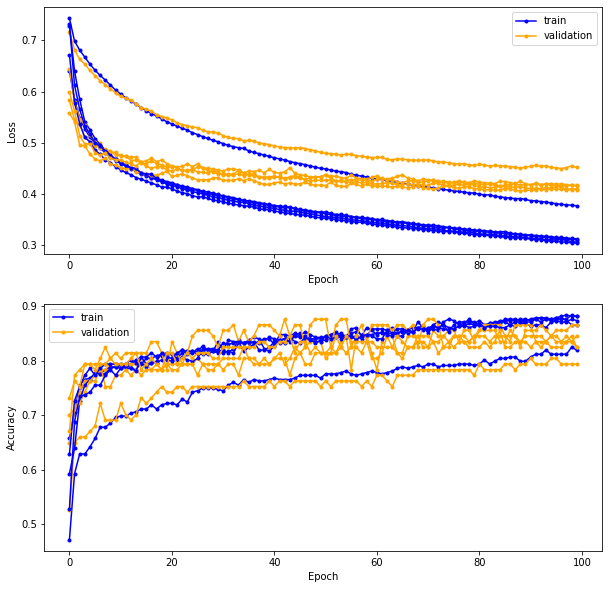

In [18]:
import warnings
warnings.filterwarnings('ignore')

def summarize_diagnostics_combine(histories):
    plt.figure(figsize=(10,10))
    
    for i in range(len(histories)):
        # plot loss
        plt.subplot(211) # 2 baris, 1 kolom, index ke-1
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.plot(histories[i].history['loss'], color='blue', marker='.', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', marker='.', label='test')
        plt.legend(['train', 'validation'], loc='upper right')
        
        # plot accuracy
        plt.subplot(212) # 2 baris, 1 kolom, index ke-2
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', marker='.', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', marker='.', label='test')
        plt.legend(['train', 'validation'], loc='bottom right')
    plt.show()
summarize_diagnostics_combine(histories)

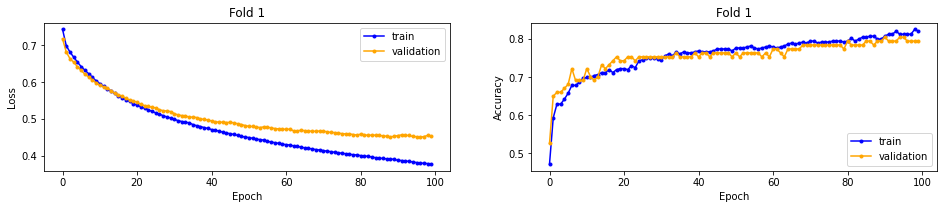

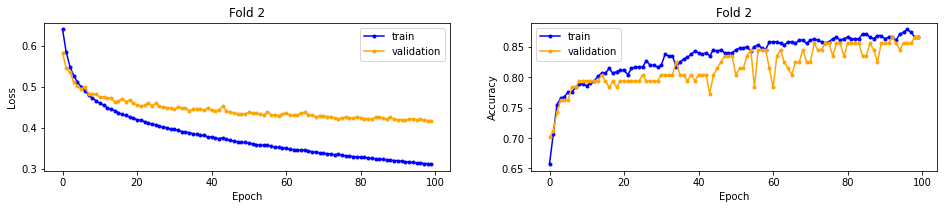

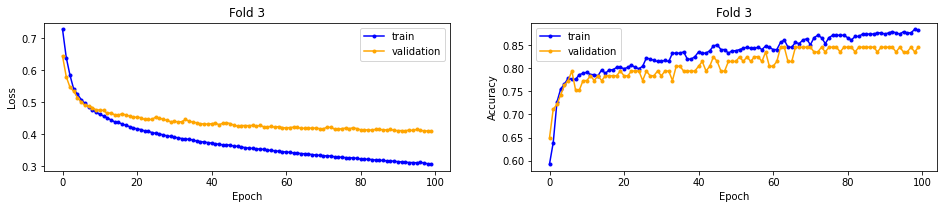

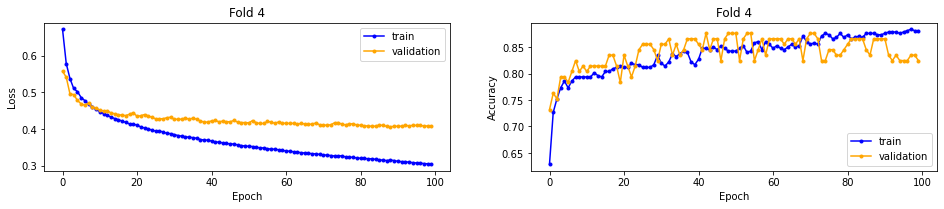

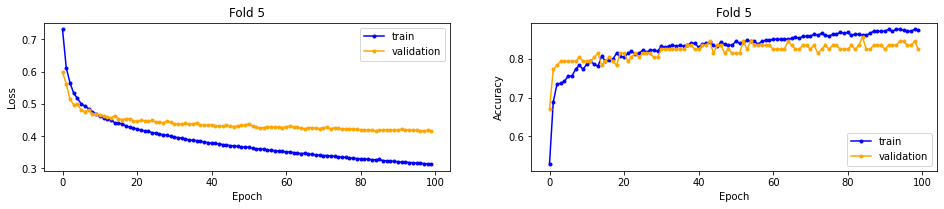

In [19]:
import warnings
warnings.filterwarnings('ignore')

def summarize_diagnostics_single(histories):
    for i in range(len(histories)):
        plt.figure(figsize=(16,6))

        # plot loss
        plt.subplot(221) # 2 baris, 2 kolom, index ke-1
        plt.title('Fold ' + str(i+1))
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.plot(histories[i].history['loss'], color='blue', marker='.', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', marker='.', label='test')
        plt.legend(['train', 'validation'], loc='upper right')
        plt.savefig(f"Loss_fold {i+1}.png")

        # plot accuracy
        plt.subplot(222) # 2 baris, 2 kolom, index ke-2
        plt.title('Fold ' + str(i+1))
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', marker='.', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', marker='.', label='test')
        plt.legend(['train', 'validation'], loc='bottom right')
        plt.savefig(f"Acc_fold {i+1}.png")
        plt.show()

summarize_diagnostics_single(histories)

Accuracy: mean=85.818 std=3.199, n=5


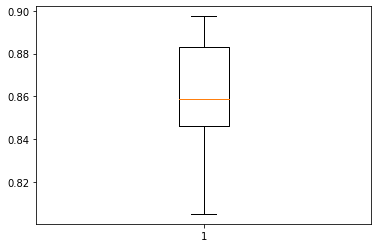

In [20]:
from numpy import mean
from numpy import std

def summarize_performance(scores):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    # box and whisker plots of results
    plt.boxplot(scores)
    plt.savefig("Mean_Std.png")
    plt.show()

# summarize estimated performance
summarize_performance(scores)

# Training tanpa K-Fold

In [21]:
os.mkdir("/content/simpan_model2_tanpa")

In [22]:
%%time

import pandas as pd

epochs = 10       # ⚠️ SESUAIKAN ⚠️
batch_size = 64   # ⚠️ SESUAIKAN ⚠️

model = define_model_mobilenetv2() 

#=======================================================================================================================================#
# CARA 1 : validation_split=0.2 ➜ artinya langsung memecah data train ➜ jadi 80% train & 20% validation ➜ memakan banyak sekali RAM
#          hal ini berarti pula bahwa penggunaan K-Fold itu memberatkan komputasi, coba saja sendiri, terlebih jika data berupa image
#          dan jumlah data hingga ribuan, hal ini akan memakan bayak sekali RAM, bahkan bisa hingga terjadi Out of Memory (OOM). Dan
#          karena alasan ini pula banyak sekali tutorial Image Classification dengan CNN yang tersebar di internet, tidak memakai
#          K-Fold. sebenarnya penggunaan K-Fold itu diperuntukan untuk Machine Learning, bukan Deep Learning, karena alasan komputasi.
#          sebagai alternatif solusinya yaitu gunakan saja pre-trained model terkenal, maka K-Fold tidak terlalu dibutuhkan, bahkan
#          jumlah epoch pun tidak harus banyak. dengan pre-trained model terkenal, meskipun dataset yang digunakan sedikit (misal
#          dibawah 1000), tetap berpotensi besar menghasilkan model yang optimal untuk kasus dataset yang digunakan. dan jika pada
#          saat testing menghasilkan akurasi yang baik, maka hal ini sudah membuktikan bahwa penggunaan K-Fold tidak terlalu dibutuhkan.
#=======================================================================================================================================#
#history = model.fit(X_train_norm, y_train_encode, validation_split=0.2, epochs=20, batch_size=32, verbose=1)

#=======================================================================================================================================#
# CARA 2 : validation_data=(X_test_norm, y_test_encode) ➜ artinya gunakan data validasi dari luar/bukan dari data train yang dipecah
#          ➜ minim penggunaan RAM. CARA 2 ini sebagai alternatif solusi yang baik jika ingin training dengan validasi sekaligus.
#=======================================================================================================================================#
#history = model.fit(X_train_norm, y_train_encode, validation_data=(X_test_norm, y_test_encode), epochs=20, batch_size=32, verbose=1)

#=======================================================================================================================================#
# CARA 3 : TANPA VALIDATION DATA. jika menggunakan CARA 2, malah menghasilkan lebih banyak salah prediksi saat testing data dari internet.
#          hal ini kemungkinan besar akibat terlalu serupanya data train dengan data validasi. Oleh karena itu, dalam kasus ini, karena
#          memang dataset yang sebenarnya hanya sedikit (banyak akibat di augmetasi saja), maka yang dilakukan hanyalah training dan
#          testing saja, tanpa melalui tahapan validasi. namun disamping itu, model yang dihasilkan sudah cukup baik. buktikan saja.
#=======================================================================================================================================#
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/10
7/7 [==============================] - 4s 73ms/step - loss: 0.8225 - accuracy: 0.4407
Epoch 2/10
7/7 [==============================] - 1s 73ms/step - loss: 0.7051 - accuracy: 0.6211
Epoch 3/10
7/7 [==============================] - 1s 73ms/step - loss: 0.6804 - accuracy: 0.6443
Epoch 4/10
7/7 [==============================] - 1s 73ms/step - loss: 0.6137 - accuracy: 0.6778
Epoch 5/10
7/7 [==============================] - 1s 73ms/step - loss: 0.5923 - accuracy: 0.7113
Epoch 6/10
7/7 [==============================] - 1s 71ms/step - loss: 0.5760 - accuracy: 0.7294
Epoch 7/10
7/7 [==============================] - 1s 73ms/step - loss: 0.5626 - accuracy: 0.7423
Epoch 8/10
7/7 [==============================] - 1s 73ms/step - loss: 0.5521 - accuracy: 0.7371
Epoch 9/10
7/7 [==============================] - 1s 75ms/step - loss: 0.5436 - accuracy: 0.7320
Epoch 10/10
7/7 [==============================] - 1s 70ms/step - loss: 0.5345 - accuracy: 0.7474
CPU times: user 6.56 s, sys: 

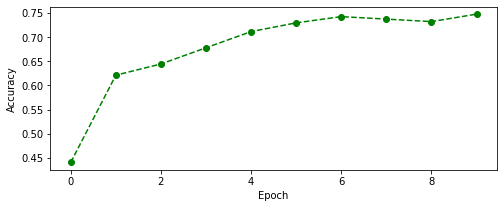

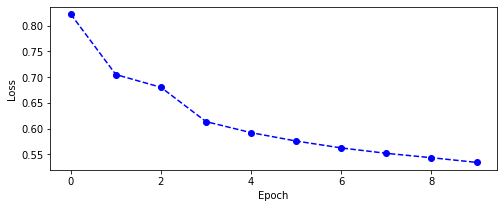

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
ax.plot(history.history['accuracy'], 'og', linestyle='dashed')
#ax.plot(history.history['val_accuracy'])
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
#ax.legend(['train', 'val'], loc='lower right')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(8, 3))
ax.plot(history.history['loss'], 'ob', linestyle='dashed')
#ax.plot(history.history['val_loss'])
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
#ax.legend(['train', 'val'], loc='upper right')
plt.show()

# Testing

In [24]:
# Bersihkan model sebelumnya (RAM cleaner)
#if "model" in globals():
  #del model
  #gc.collect()

# Load model
from tensorflow.keras.models import load_model
# Masukkan path model yang dipilih
model = load_model( path_save+'/model_fold_1.h5') # ⚠️ SESUAIKAN ⚠️
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [25]:
from sklearn.preprocessing import LabelBinarizer

# RAM cleaner
#if "encoder" in globals():
  #del encoder
  #del y_train_encode_new
  #del y_test_encode_new
  #del pred
  #del prediksi
  #del pred_label
  #del true_label
  #gc.collect()

# Encoding Labels (y) dengan cara yang berbeda, untuk keperluan confusion matrix
encoder             = LabelBinarizer()
y_train_encode_new  = encoder.fit_transform(Y_train)
y_test_encode_new   = encoder.fit_transform(Y_test)

# ============================================================================ #
# =============================== DATA TESTING =============================== #
# ============================================================================ #

pred        = model.predict(X_test.astype('float32'), verbose=0)
prediksi    = np.argmax(pred, axis=-1) # coba -> predict.shape -> (800, 5) -> maka axis=-1 itu akan ngambil nilai 5 tersebut (yaitu kategori/labelnya)

'''
Please use instead:
* np.argmax(model.predict(x), axis=-1)      if your model does multi-class classification (e.g. if it uses a `softmax` last-layer activation).
* (model.predict(x) > 0.5).astype("int32")  if your model does binary classification (e.g. if it uses a `sigmoid` last-layer activation).
'''

pred_label  = model.predict(X_test, batch_size=64, verbose=0)  # label hasil prediksi
true_label  = np.argmax(y_test_encode_new, axis=-1)                         # label yang sebenarnya

print("Label Prediksi   :", pred_label)
print("Label Sebenarya  :", true_label, "\n")
loss, acc = model.evaluate(X_test, y_test_encode_new, verbose=1)

Label Prediksi   : [[0.43622226]
 [0.48809594]
 [0.48628834]
 [0.6125889 ]
 [0.82925075]
 [0.6292525 ]
 [0.417716  ]
 [0.59634864]
 [0.768201  ]
 [0.8767403 ]
 [0.1746269 ]
 [0.05335878]
 [0.6735618 ]
 [0.6886663 ]
 [0.61059153]
 [0.8395109 ]
 [0.9174744 ]
 [0.4310571 ]
 [0.85934633]
 [0.5949341 ]
 [0.57667327]
 [0.2750596 ]
 [0.8687253 ]
 [0.91165155]
 [0.61133796]
 [0.85180587]
 [0.3381805 ]
 [0.93142676]
 [0.8817905 ]
 [0.810539  ]
 [0.7155576 ]
 [0.9617182 ]
 [0.6142693 ]
 [0.91065335]
 [0.42629623]
 [0.8250571 ]
 [0.06389403]
 [0.21133803]
 [0.94045126]
 [0.85431325]
 [0.76344275]
 [0.13058206]
 [0.58939767]
 [0.5820124 ]
 [0.6373711 ]
 [0.8441291 ]
 [0.66580635]
 [0.9559975 ]
 [0.7574688 ]
 [0.5708019 ]
 [0.69201666]
 [0.8305392 ]
 [0.9163236 ]
 [0.7891959 ]
 [0.36564845]
 [0.6025851 ]
 [0.34921002]
 [0.8577452 ]
 [0.45063043]
 [0.66093415]
 [0.79656255]
 [0.65202713]
 [0.895382  ]
 [0.82427984]
 [0.93629336]
 [0.8843146 ]
 [0.96977544]
 [0.898411  ]
 [0.2857677 ]
 [0.5842891 ]
 

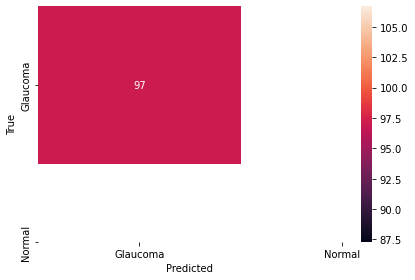

In [26]:
import sklearn.metrics as metrics
import seaborn as sn
import matplotlib.pyplot as plt

confusion_matrix = metrics.confusion_matrix(Y_test.argmax(axis=1),pred.argmax(axis=1))
x_axis_labels = ['Glaucoma','Normal']
y_axis_labels = ['Glaucoma','Normal']
sn.heatmap(confusion_matrix, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig("Confuison_matrix.jpg")
plt.tight_layout()
plt.show()

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

In [28]:
class_labels = ['Glaucoma','Normal']
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 1
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_encode_new[:,i], pred[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [29]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_encode_new.ravel(), pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

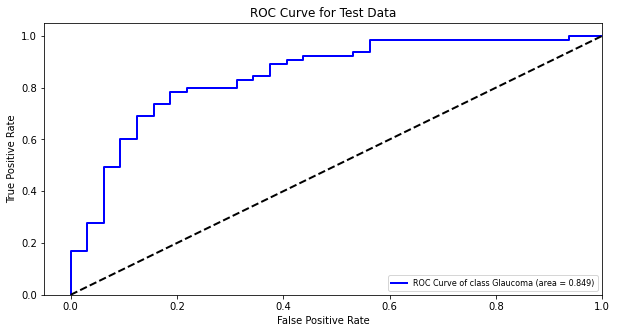

In [30]:
colors = cycle(['blue', 'red', 'green', 'brown', 'purple'])
plt.figure(figsize=(10,5))
for i, color, lbl in zip(range(n_classes), colors, class_labels):
  plt.plot(fpr[i], tpr[i], color = color, lw = 2, label = 'ROC Curve of class {0} (area = {1:0.3f})'.format(lbl, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw = 2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Data')
plt.legend(loc = 'lower right', prop = {'size': 8})
plt.savefig("Roc_curve1.jpg")
plt.show()